# Notebook Cleaning

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [232]:
url = r"..\data\raw\raw_huis_te_koop.csv"
house = pd.read_csv(url, sep=",")
url = r"..\data\raw\raw_apartement_te_koop.csv"
app = pd.read_csv(url, sep=",")

### Remove duplicates

In [233]:
def removedup_id(df):
    dup = df.duplicated(subset=["property_id"]).sum()
    print(dup)
    df.drop_duplicates(subset=["property_id"],keep="first", inplace=True)
    dup = df.duplicated(subset=["property_id"]).sum()
    print(dup)
    

In [234]:
removedup_id(house)
removedup_id(app)

2239
0
122
0


### drop streetname and nr

In [235]:
def remove_street_nr(df):
    df.drop(["street_name", "house_number"], axis="columns", inplace= True)
    return df


In [236]:
remove_street_nr(house)
remove_street_nr(app)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building
0,11151864,Turnhout,2300,51.316287,4.932205,HOUSE,HOUSE,175000.0,BUY_REGULAR,NaN,...,NaN,1,1.0,NaN,1.0,NaN,227.0,3.0,NaN,TO_RENOVATE
1,11154023,Beringen,3582,51.065132,5.227231,HOUSE,HOUSE,249000.0,BUY_REGULAR,1.0,...,NaN,0,NaN,NaN,NaN,NaN,1186.0,4.0,NaN,TO_BE_DONE_UP
2,11141961,SAINT-JOSSE-TEN-NOODE,1210,NaN,NaN,APARTMENT,FLAT_STUDIO,120000.0,BUY_REGULAR,NaN,...,NaN,0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,TO_BE_DONE_UP
3,11150522,Gavere,9890,50.914593,3.650555,HOUSE_GROUP,HOUSE_GROUP,NaN,BUY_REGULAR,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11145864,Comblain-Fairon,4180,50.446027,5.542826,HOUSE,HOUSE,499000.0,BUY_REGULAR,21.0,...,NaN,0,NaN,NaN,NaN,NaN,1323.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16571,10795049,Aalter,9880,51.087235,3.448468,APARTMENT,APARTMENT,378000.0,BUY_REGULAR,10.0,...,NaN,0,1.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN
16572,11089010,Woluwe-Saint-Lambert,1200,50.840846,4.421270,APARTMENT,DUPLEX,335000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,31.0,NaN,NaN,NaN,2.0,NaN,GOOD
16573,11150113,Boutersem,3370,50.831096,4.829753,HOUSE,VILLA,499000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,NaN,NaN,NaN,1528.0,4.0,NaN,JUST_RENOVATED
16574,11153256,Laeken,1020,50.874875,4.339214,APARTMENT,APARTMENT,208000.0,BUY_REGULAR,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOOD


### Remove app in house and house in app

In [237]:
house.groupby("property_type").count()
app.groupby("property_type").count()

,property_id,locality_name,postal_code,latitude,longitude,property_subtype,price,type_of_sale,number_of_rooms,living_area,...,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building
property_type,,,,,,,,,,,,,,,,,,,,,
APARTMENT,9980,9980,9980,8874,8874,9980,9980,9980,3015,9663,...,4045,9980,6834,5330,805,635,0,6304,3893,7593
APARTMENT_GROUP,1178,1178,1178,1043,1043,1178,0,1178,0,0,...,30,1178,0,0,0,0,0,0,0,0
HOUSE,5185,5185,5185,4245,4245,5185,5185,5185,1327,4701,...,1560,5185,2697,1231,1921,1428,5185,4240,1306,3838
HOUSE_GROUP,111,111,111,93,93,111,0,111,0,0,...,1,111,0,0,0,0,0,0,0,0


In [238]:
## ~ this symbol means that all the things like house and house_group are exclude out of the new dataframe
def remove_house_in_app(df):
    df = df[~df["property_type"].isin(["HOUSE", "HOUSE_GROUP"])]
    return df


In [239]:
def remove_app_in_house(df):
    df = df[df["property_type"].isin(["HOUSE", "HOUSE_GROUP"])]
    return df

In [240]:
house = remove_app_in_house(house)
app = remove_house_in_app(app)


### Strip all the columns

In [241]:
def strip_all_columns(df):
    cl = []
    for columns in df:
        cl.append(columns)
    return cl

In [242]:
def strip(df):
    cl = strip_all_columns(df)
    for column_name in cl:
        if df[column_name].dtype == 'object':  # Check if the column contains object (string) values
            df.loc[:, column_name] = df[column_name].str.strip()
    return df

In [243]:
house = strip(house)
app = strip(app)

### Dataframe Info

In [244]:
house.info()
app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13904 entries, 0 to 19970
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_id             13904 non-null  int64  
 1   locality_name           13904 non-null  object 
 2   postal_code             13904 non-null  object 
 3   latitude                12034 non-null  float64
 4   longitude               12034 non-null  float64
 5   property_type           13904 non-null  object 
 6   property_subtype        13904 non-null  object 
 7   price                   13302 non-null  float64
 8   type_of_sale            13904 non-null  object 
 9   number_of_rooms         3962 non-null   float64
 10  living_area             12492 non-null  float64
 11  kitchen_type            8391 non-null   object 
 12  fully_equipped_kitchen  10193 non-null  float64
 13  furnished               4589 non-null   float64
 14  open_fire               13904 non-null  int

In [245]:
house.groupby("property_type").count()


,property_id,locality_name,postal_code,latitude,longitude,property_subtype,price,type_of_sale,number_of_rooms,living_area,...,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building
property_type,,,,,,,,,,,,,,,,,,,,,
HOUSE,13302,13302,13302,11473,11473,13302,13302,13302,3962,12492,...,4574,13302,7598,3880,5192,4349,13302,11156,4522,10515
HOUSE_GROUP,602,602,602,561,561,602,0,602,0,0,...,15,602,0,0,0,0,0,0,0,0


In [246]:
app.groupby("property_type").count()

,property_id,locality_name,postal_code,latitude,longitude,property_subtype,price,type_of_sale,number_of_rooms,living_area,...,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building
property_type,,,,,,,,,,,,,,,,,,,,,
APARTMENT,9980,9980,9980,8874,8874,9980,9980,9980,3015,9663,...,4045,9980,6834,5330,805,635,0,6304,3893,7593
APARTMENT_GROUP,1178,1178,1178,1043,1043,1178,0,1178,0,0,...,30,1178,0,0,0,0,0,0,0,0


# Notebook Data Analytics

### Data Info

In [247]:
Cleanurl = r"..\data\cleaned\clean_app.csv"
app = pd.read_csv(Cleanurl, sep=",")
Cleanurl = r"..\data\cleaned\clean_house.csv"
house = pd.read_csv(Cleanurl, sep=",")

In [248]:
house.head(10)
house.columns

Index(['property_id', 'locality_name', 'postal_code', 'latitude', 'longitude',
       'property_type', 'property_subtype', 'price', 'type_of_sale',
       'number_of_rooms', 'living_area', 'kitchen_type',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'surface_of_good',
       'number_of_facades', 'swimming_pool', 'state_of_building'],
      dtype='object')

In [249]:
app.head(10)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building
0,11141961,SAINT-JOSSE-TEN-NOODE,1210,NaN,NaN,APARTMENT,FLAT_STUDIO,120000.0,BUY_REGULAR,NaN,...,NaN,0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,TO_BE_DONE_UP
1,11158977,Elsene,1050,50.832733,4.364130,APARTMENT,APARTMENT,325000.0,BUY_REGULAR,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW
2,11072105,Bruxelles,1040,50.843509,4.370263,APARTMENT,APARTMENT,650000.0,BUY_REGULAR,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,3.0,0.0,AS_NEW
3,11129303,De Haan,8420,51.257157,2.999425,APARTMENT,APARTMENT,119000.0,BUY_REGULAR,1.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOOD
4,11155131,Vorselaar,2290,51.202692,4.768350,APARTMENT,APARTMENT,249000.0,BUY_REGULAR,NaN,...,NaN,1,1.0,NaN,NaN,NaN,NaN,3.0,NaN,GOOD
5,11142564,Waver,1300,50.721307,4.625271,APARTMENT,DUPLEX,135000.0,BUY_REGULAR,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,3.0,NaN,TO_BE_DONE_UP
6,11093958,Nijvel,1400,50.599522,4.333127,APARTMENT,GROUND_FLOOR,165000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,10.0,NaN,NaN,NaN,NaN,0.0,GOOD
7,10708937,Waterloo,1410,50.711530,4.355124,APARTMENT,APARTMENT,496150.0,BUY_REGULAR,NaN,...,NaN,0,1.0,16.0,NaN,NaN,NaN,NaN,NaN,AS_NEW
8,10985322,Brussel,1000,50.847441,4.347515,APARTMENT,APARTMENT,415000.0,BUY_REGULAR,NaN,...,NaN,1,NaN,NaN,1.0,45.0,NaN,NaN,NaN,AS_NEW
9,10978765,Knokke,8300,51.351968,3.288690,APARTMENT,APARTMENT,319000.0,BUY_REGULAR,5.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


### Price per location

In [250]:
locatie = house[["locality_name", "price"]]

In [251]:
locatie

,locality_name,price
0,Ronse,245000.0
1,Merelbeke,315000.0
2,FORÊT,325000.0
3,Ganshoren,1149000.0
4,Ottignies,395000.0
...,...,...
13198,Borgworm,499000.0
13199,Itegem,330000.0
13200,Oudenaarde,393000.0
13201,OPWIJK,160000.0


In [252]:
priceMean = locatie.groupby("locality_name").mean()

In [253]:
priceMean

,price
locality_name,
's Gravenbrakel,2.783333e+05
's Gravenwezel,1.385000e+06
AALST,4.102667e+05
AALTER,3.120000e+05
AARSCHOT,6.100000e+05
...,...
Éghezée,4.333333e+05
àben-àmael,2.500000e+05
àcaussinnes,5.365000e+05


In [254]:
locationHead = locatie[locatie["locality_name"].isin(["Gent", "Brugge", "Brussel", "Leuven"])]

In [255]:
locationHead.head(10)

,locality_name,price
44,Gent,559000.0
47,Gent,400000.0
79,Gent,428000.0
89,Gent,289000.0
107,Gent,295000.0
116,Gent,735000.0
119,Leuven,995000.0
130,Gent,595000.0
230,Gent,325000.0
245,Gent,498000.0


<Axes: xlabel='locality_name', ylabel='price'>

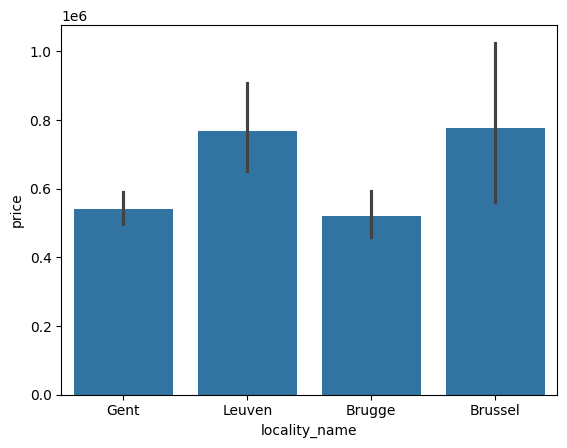

In [256]:
sns.barplot(x="locality_name",
            y="price",
            data=locationHead)


### correlation

In [257]:
house.columns

Index(['property_id', 'locality_name', 'postal_code', 'latitude', 'longitude',
       'property_type', 'property_subtype', 'price', 'type_of_sale',
       'number_of_rooms', 'living_area', 'kitchen_type',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'surface_of_good',
       'number_of_facades', 'swimming_pool', 'state_of_building'],
      dtype='object')

In [258]:
locality_house = house[["locality_name", "price","living_area", "open_fire", "terrace_area", "surface_of_good", "garden_area", "number_of_facades"]]

In [259]:
house.head(10)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building
0,11157483,Ronse,9600,50.741809,3.607601,HOUSE,HOUSE,245000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,13.0,1.0,161.0,250.0,2.0,0.0,GOOD
1,11156843,Merelbeke,9820,51.019250,3.760957,HOUSE,HOUSE,315000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,23.0,NaN,NaN,77.0,2.0,NaN,GOOD
2,11161362,FORÊT,4870,50.563966,5.675489,HOUSE,HOUSE,325000.0,BUY_REGULAR,NaN,...,NaN,0,1.0,16.0,1.0,420.0,572.0,3.0,NaN,AS_NEW
3,11160440,Ganshoren,1083,50.873909,4.307285,HOUSE,HOUSE,1149000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,30.0,1.0,270.0,400.0,3.0,NaN,AS_NEW
4,11153591,Ottignies,1340,50.671784,4.575929,HOUSE,HOUSE,395000.0,BUY_REGULAR,NaN,...,NaN,0,1.0,37.0,1.0,76.0,165.0,2.0,NaN,GOOD
5,11128275,Antwerpen Merksem,2170,51.243743,4.443372,HOUSE,MIXED_USE_BUILDING,399900.0,BUY_REGULAR,NaN,...,0.0,0,NaN,NaN,NaN,NaN,65.0,2.0,0.0,GOOD
6,11157340,Hoei,4500,50.524452,5.234238,HOUSE,APARTMENT_BLOCK,300000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,35.0,1.0,300.0,450.0,2.0,0.0,GOOD
7,11159641,Luik,4020,50.636057,5.589725,HOUSE,HOUSE,499000.0,BUY_REGULAR,NaN,...,NaN,1,1.0,14.0,1.0,135.0,315.0,2.0,0.0,AS_NEW
8,11156973,Marchin,4570,50.482355,5.249561,HOUSE,BUNGALOW,249000.0,BUY_REGULAR,NaN,...,NaN,1,1.0,NaN,1.0,355.0,739.0,4.0,0.0,GOOD
9,11159253,Oupeye,4680,50.708677,5.621946,HOUSE,HOUSE,299000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,25.0,1.0,204.0,381.0,3.0,0.0,TO_BE_DONE_UP


### correlation between price and living_area

In [260]:
corr = locality_house["living_area"].corr(locality_house["price"])
round(corr,2)

0.43

### Correlation between price terrace area

In [261]:
corr = locality_house["price"].corr(locality_house["terrace_area"])
round(corr,2)

0.31

### Correlation between terrace area and living area

In [262]:
corr = locality_house["living_area"].corr(locality_house["terrace_area"])
round(corr,2)

0.17

### correlation between all values

In [263]:
nhouse = locality_house[["price","living_area", "open_fire", "terrace_area", "surface_of_good", "garden_area", "number_of_facades"]]

In [264]:
nhouse.corr()

,price,living_area,open_fire,terrace_area,surface_of_good,garden_area,number_of_facades
price,1.000000,0.434501,-0.020591,0.306860,0.135575,0.263905,0.201432
living_area,0.434501,1.000000,0.020838,0.171039,0.114784,0.207540,0.134869
open_fire,-0.020591,0.020838,1.000000,-0.008276,0.013793,0.022937,0.048590
terrace_area,0.306860,0.171039,-0.008276,1.000000,0.148045,0.107565,0.186175
surface_of_good,0.135575,0.114784,0.013793,0.148045,1.000000,0.856587,0.100389
garden_area,0.263905,0.207540,0.022937,0.107565,0.856587,1.000000,0.174317
number_of_facades,0.201432,0.134869,0.048590,0.186175,0.100389,0.174317,1.000000


<Axes: >

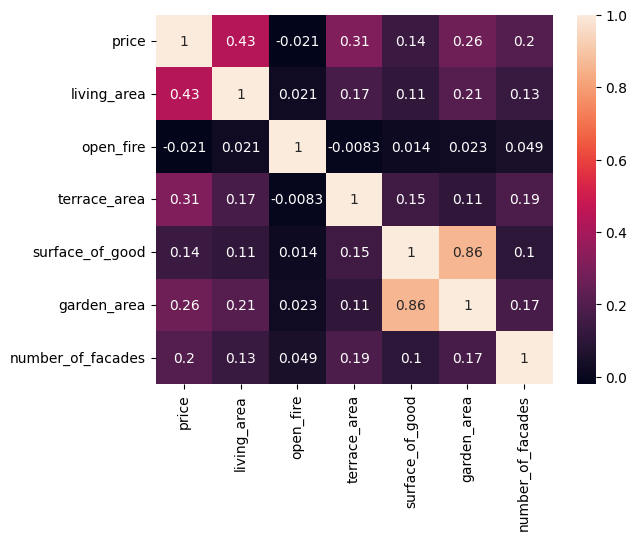

In [265]:
sns.heatmap(nhouse.corr(), annot=True)


### Correlation in gent price and living area

In [266]:
ghouse = locality_house[locality_house["locality_name"] == "Gent"]
ghouse.head(5)

,locality_name,price,living_area,open_fire,terrace_area,surface_of_good,garden_area,number_of_facades
44,Gent,559000.0,128.0,0,22.0,76.0,22.0,2.0
47,Gent,400000.0,131.0,0,NaN,240.0,113.0,2.0
79,Gent,428000.0,219.0,0,50.0,483.0,200.0,4.0
89,Gent,289000.0,154.0,0,NaN,55.0,8.0,2.0
107,Gent,295000.0,124.0,0,NaN,53.0,NaN,2.0


In [267]:
ghouse = ghouse[["price","living_area", "open_fire", "terrace_area", "surface_of_good", "garden_area", "number_of_facades"]]

<Axes: >

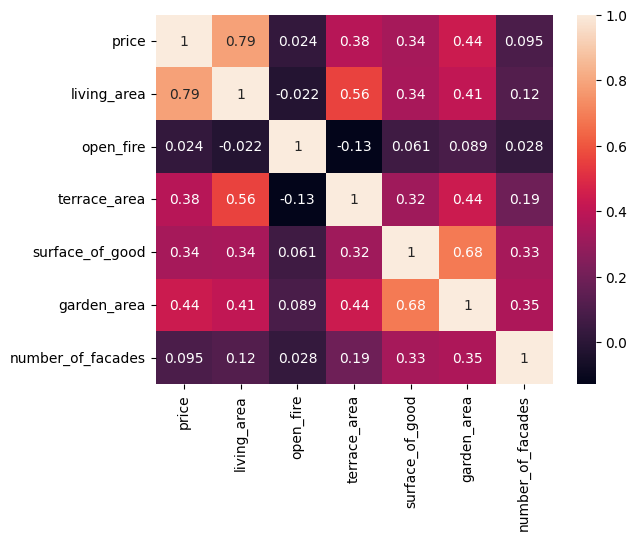

In [268]:
sns.heatmap(ghouse.corr(), annot=True)

<Axes: xlabel='price', ylabel='living_area'>

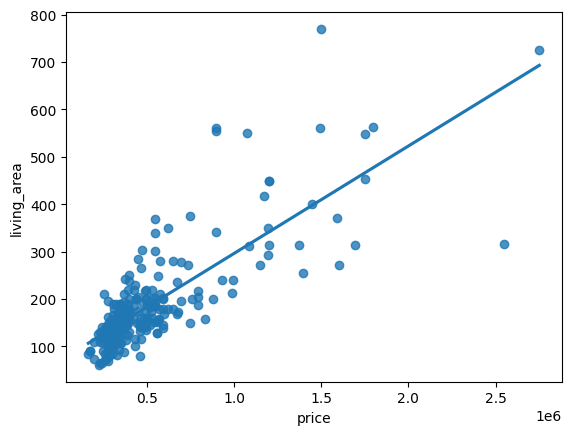

In [269]:
sns.regplot(data = ghouse, x="price", y="living_area", ci=None)


<Axes: xlabel='terrace_area', ylabel='living_area'>

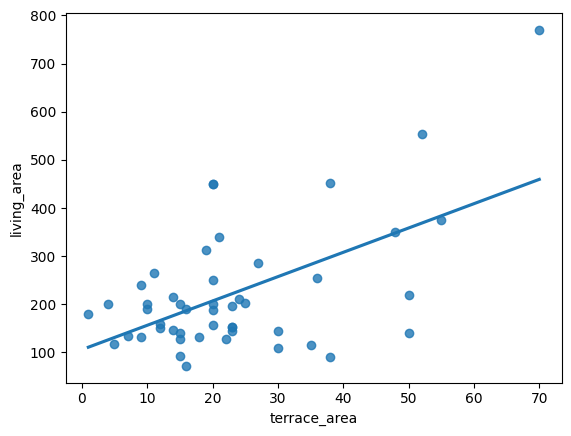

In [270]:
sns.regplot(data = ghouse, x="terrace_area", y="living_area", ci=None)

### Correlation in brussel

In [271]:
bhouse = locality_house[locality_house["locality_name"] == "Brussel"]
bhouse.count()


locality_name        9
price                9
living_area          9
open_fire            9
terrace_area         5
surface_of_good      9
garden_area          2
number_of_facades    9
dtype: int64

In [272]:
bhouse = bhouse[["price","living_area", "terrace_area", "surface_of_good", "garden_area", "number_of_facades"]]
bhouse.head(5)

,price,living_area,terrace_area,surface_of_good,garden_area,number_of_facades
1565,455000.0,140.0,NaN,54.0,NaN,2.0
1637,570000.0,220.0,24.0,13.0,37.0,2.0
2807,320000.0,180.0,NaN,45.0,NaN,2.0
3015,449000.0,205.0,12.0,75.0,18.0,2.0
3170,835000.0,425.0,120.0,0.0,NaN,3.0


<Axes: >

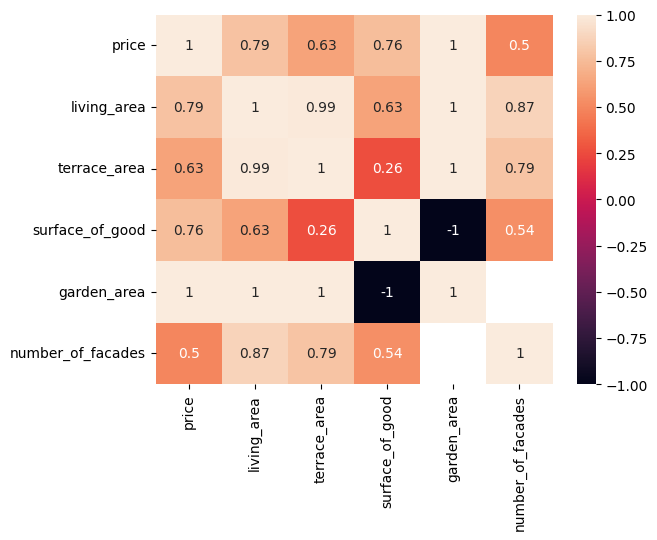

In [273]:
sns.heatmap(bhouse.corr(), annot=True)

<Axes: xlabel='price', ylabel='living_area'>

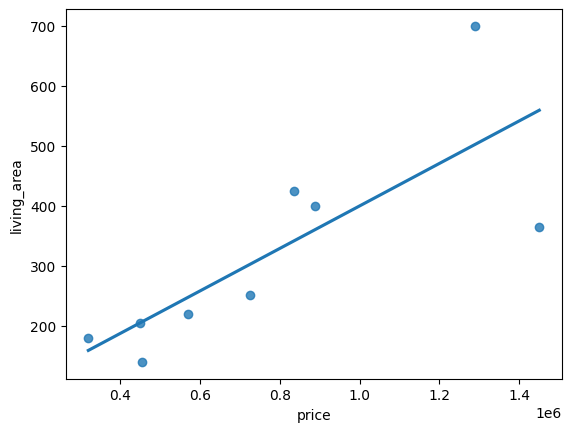

In [274]:
sns.regplot(data = bhouse, x="price", y="living_area", ci=None)

<Axes: xlabel='surface_of_good', ylabel='living_area'>

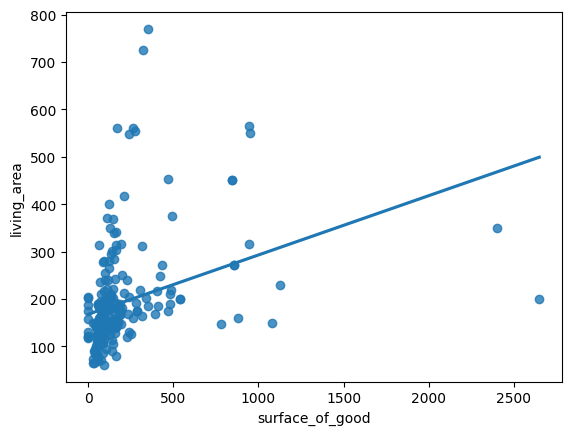

In [275]:
sns.regplot(data = ghouse, x="surface_of_good", y="living_area", ci=None)

<Axes: xlabel='terrace_area', ylabel='living_area'>

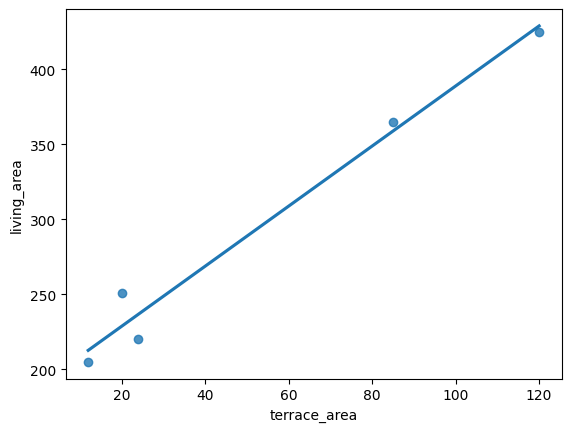

In [276]:
sns.regplot(data = bhouse, x="terrace_area", y="living_area", ci=None)

<Axes: xlabel='surface_of_good', ylabel='garden_area'>

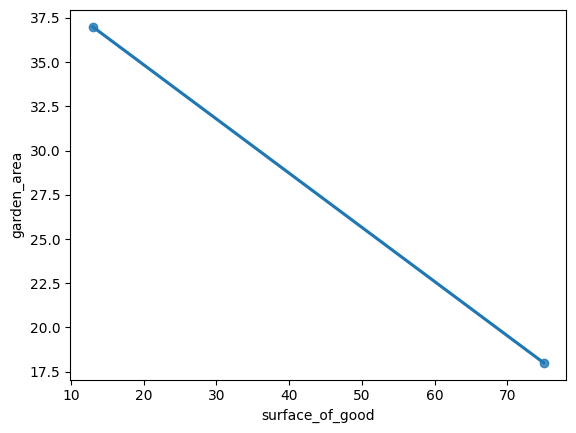

In [277]:
sns.regplot(data = bhouse, x="surface_of_good", y="garden_area", ci=None)

### Correlation of the state of the building

In [278]:
house.head(20)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building
0,11157483,Ronse,9600,50.741809,3.607601,HOUSE,HOUSE,245000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,13.0,1.0,161.0,250.0,2.0,0.0,GOOD
1,11156843,Merelbeke,9820,51.019250,3.760957,HOUSE,HOUSE,315000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,23.0,NaN,NaN,77.0,2.0,NaN,GOOD
2,11161362,FORÊT,4870,50.563966,5.675489,HOUSE,HOUSE,325000.0,BUY_REGULAR,NaN,...,NaN,0,1.0,16.0,1.0,420.0,572.0,3.0,NaN,AS_NEW
3,11160440,Ganshoren,1083,50.873909,4.307285,HOUSE,HOUSE,1149000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,30.0,1.0,270.0,400.0,3.0,NaN,AS_NEW
4,11153591,Ottignies,1340,50.671784,4.575929,HOUSE,HOUSE,395000.0,BUY_REGULAR,NaN,...,NaN,0,1.0,37.0,1.0,76.0,165.0,2.0,NaN,GOOD
5,11128275,Antwerpen Merksem,2170,51.243743,4.443372,HOUSE,MIXED_USE_BUILDING,399900.0,BUY_REGULAR,NaN,...,0.0,0,NaN,NaN,NaN,NaN,65.0,2.0,0.0,GOOD
6,11157340,Hoei,4500,50.524452,5.234238,HOUSE,APARTMENT_BLOCK,300000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,35.0,1.0,300.0,450.0,2.0,0.0,GOOD
7,11159641,Luik,4020,50.636057,5.589725,HOUSE,HOUSE,499000.0,BUY_REGULAR,NaN,...,NaN,1,1.0,14.0,1.0,135.0,315.0,2.0,0.0,AS_NEW
8,11156973,Marchin,4570,50.482355,5.249561,HOUSE,BUNGALOW,249000.0,BUY_REGULAR,NaN,...,NaN,1,1.0,NaN,1.0,355.0,739.0,4.0,0.0,GOOD
9,11159253,Oupeye,4680,50.708677,5.621946,HOUSE,HOUSE,299000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,25.0,1.0,204.0,381.0,3.0,0.0,TO_BE_DONE_UP


In [279]:
house.groupby('state_of_building').count()

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool
state_of_building,,,,,,,,,,,,,,,,,,,,,
AS_NEW,1875,1875,1875,1494,1494,1875,1875,1875,1875,322,...,1631,1064,1875,1483,877,970,873,1875,1758,1070
GOOD,4761,4761,4761,4047,4047,4761,4761,4761,4761,1824,...,3626,1366,4761,2826,1414,1901,1627,4761,4060,1475
JUST_RENOVATED,524,524,524,449,449,524,524,524,524,102,...,465,147,524,367,234,269,225,524,467,187
TO_BE_DONE_UP,1269,1269,1269,1109,1109,1269,1269,1269,1269,284,...,1048,446,1269,719,377,549,455,1269,1107,448
TO_RENOVATE,1912,1912,1912,1697,1697,1912,1912,1912,1912,503,...,1423,555,1912,856,404,756,589,1912,1616,537
TO_RESTORE,102,102,102,90,90,102,102,102,102,42,...,61,17,102,49,22,42,33,102,76,17


In [280]:
statebuilding = house[["state_of_building", "price","living_area", "open_fire", "terrace_area", "surface_of_good", "garden_area", "number_of_facades"]]


### State of building is New

<Axes: >

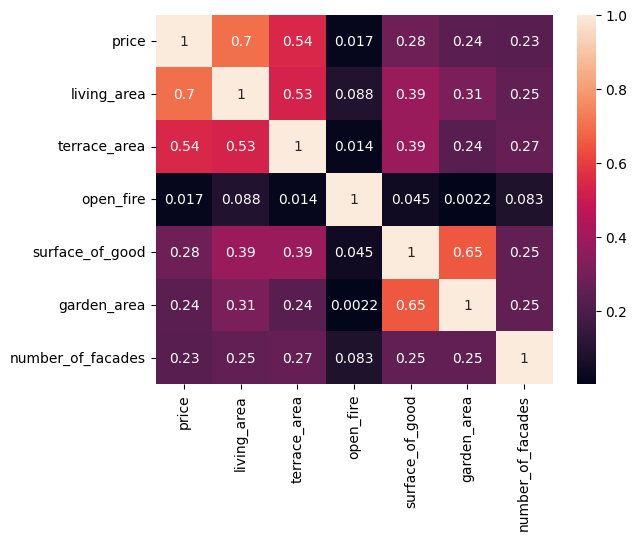

In [281]:
new = statebuilding[statebuilding["state_of_building"]=="AS_NEW"]
new = new[["price", "living_area", "terrace_area", "open_fire", "surface_of_good", "garden_area", "number_of_facades"]]
sns.heatmap(new.corr(), annot=True)

<Axes: xlabel='price', ylabel='living_area'>

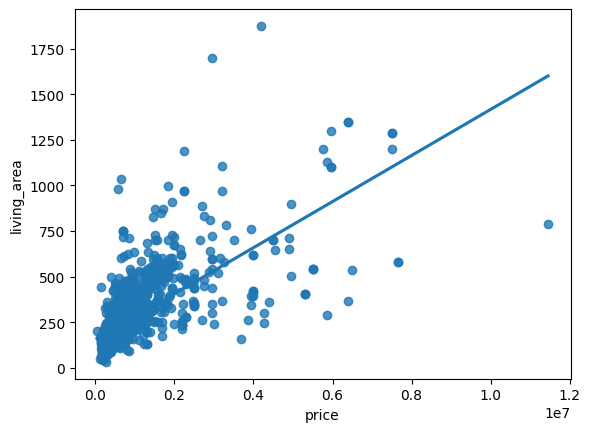

In [282]:
sns.regplot(data = new, x="price", y="living_area", ci=None)

### State of building GOOD

<Axes: >

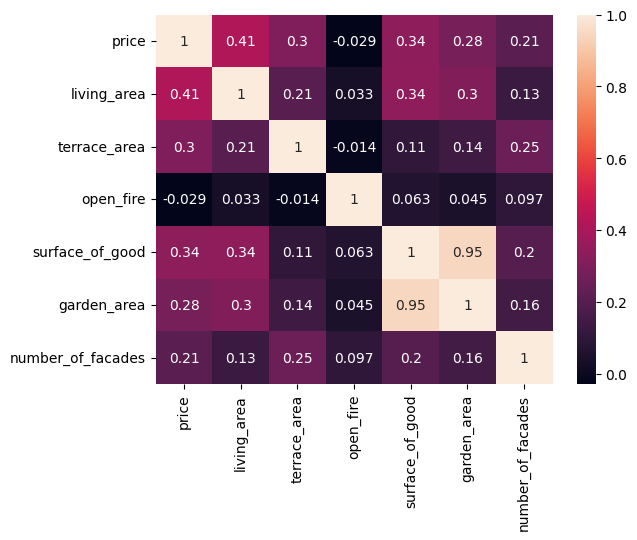

In [283]:
good = statebuilding[statebuilding["state_of_building"]=="GOOD"]
good = good[["price", "living_area", "terrace_area", "open_fire", "surface_of_good", "garden_area", "number_of_facades"]]
sns.heatmap(good.corr(), annot=True)

<Axes: xlabel='price', ylabel='living_area'>

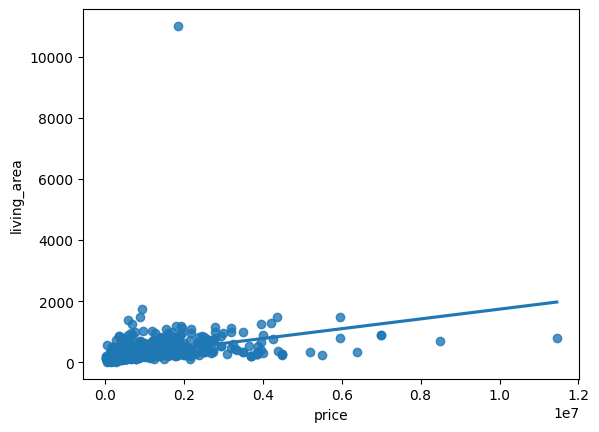

In [284]:
sns.regplot(data = good, x="price", y="living_area", ci=None)

### State of building TO_BE_DONE_UP

<Axes: >

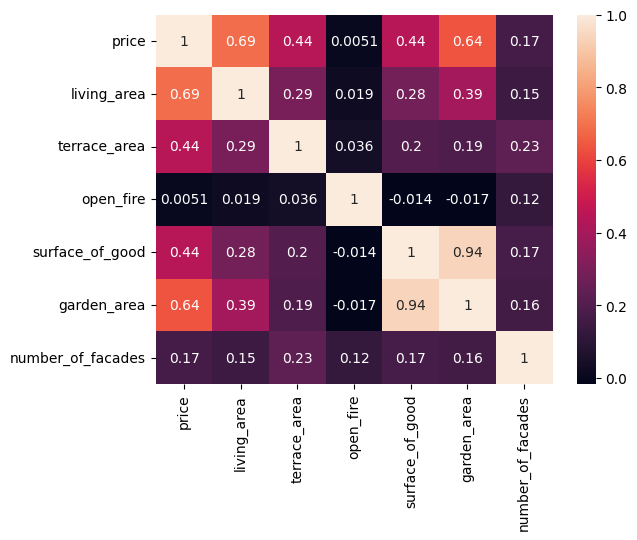

In [285]:
done_up = statebuilding[statebuilding["state_of_building"]=="TO_BE_DONE_UP"]
done_up = done_up[["price", "living_area", "terrace_area", "open_fire", "surface_of_good", "garden_area", "number_of_facades"]]
sns.heatmap(done_up.corr(), annot=True)

<Axes: xlabel='surface_of_good', ylabel='garden_area'>

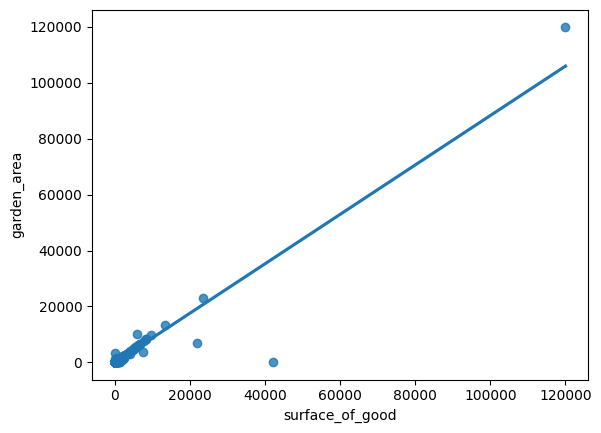

In [287]:
sns.regplot(data = done_up, x="surface_of_good", y="garden_area", ci=None)


# Question for the project

The Question: What is the correlation between the variables and the price? Why do you think some variables are more correlated than others?

Anwser:

<Axes: >

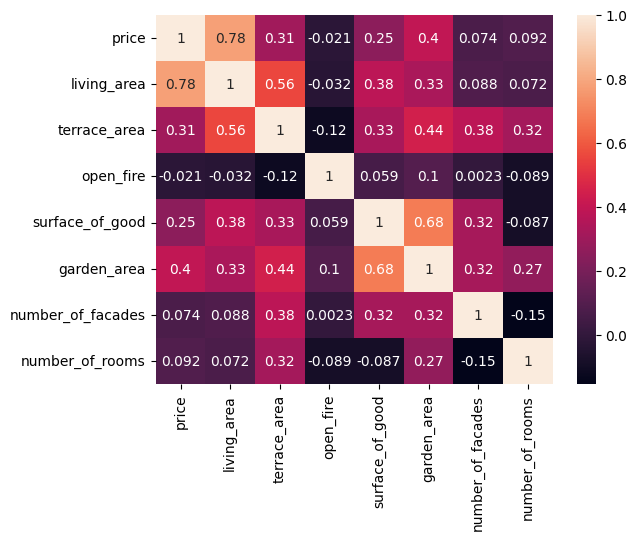

In [301]:
thouse = house[["locality_name","price", "living_area", "terrace_area", "open_fire", "surface_of_good", "garden_area", "number_of_facades", "number_of_rooms"]]
gent_brugge_house = thouse[(thouse["locality_name"] == "Gent") | (thouse["locality_name"] == "Brugge")]
gent_brugge_house = gent_brugge_house[["price", "living_area", "terrace_area", "open_fire", "surface_of_good", "garden_area", "number_of_facades", "number_of_rooms"]]
sns.heatmap(gent_brugge_house.corr(), annot=True)

C:\Users\semde\AppData\Local\Temp\ipykernel_6480\3169971590.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gent_leuven_house = tapp[(thouse["locality_name"] == "Gent") | (thouse["locality_name"] == "Leuven")]


<Axes: >

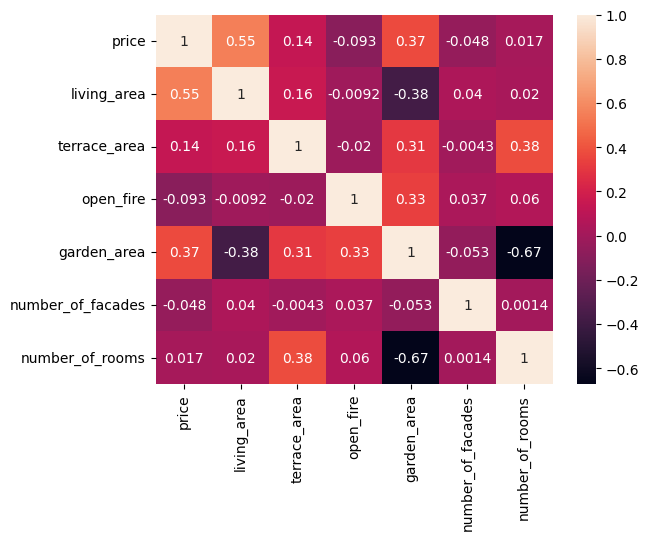

In [307]:
tapp = app[["locality_name","price", "living_area", "terrace_area", "open_fire", "garden_area", "number_of_facades", "number_of_rooms"]]
gent_leuven_house = tapp[(thouse["locality_name"] == "Gent") | (thouse["locality_name"] == "Leuven")]
gent_leuven_house = gent_leuven_house[["price", "living_area", "terrace_area", "open_fire", "garden_area", "number_of_facades", "number_of_rooms"]]
sns.heatmap(gent_leuven_house.corr(), annot=True)